# Course 4 (Feature Selection and Dimensionality Reduction) - Final Project
# Sumukha R 

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# The dataset
df = pd.read_csv("Problem Statement - Dimentionality Reduction-Dataset.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
# Checking for null values
df.shape, df.isna().sum()

((550068, 12),
 User_ID                            0
 Product_ID                         0
 Gender                             0
 Age                                0
 Occupation                         0
 City_Category                      0
 Stay_In_Current_City_Years         0
 Marital_Status                     0
 Product_Category_1                 0
 Product_Category_2            173638
 Product_Category_3            383247
 Purchase                           0
 dtype: int64)

# Dealing with missing values 

In [4]:
# Calculating percentage of missing values
missed = df[["Product_Category_2", "Product_Category_3"]]
missed.isna().sum() / df.shape[0]

Product_Category_2    0.315666
Product_Category_3    0.696727
dtype: float64

Product_Category_3 has 69.67% missing values. This feature cannot provide useful information even if imputed. Using missing value ratio technique, Product_Category_3 will be removed.   
Product_Category_2 can be imputed as it has only 31.56% of missing values. 

In [5]:
# Dropping Product_Category_3 column
df.drop(["Product_Category_3"], axis=1, inplace=True)

In [6]:
df.Product_Category_2.value_counts().sort_index()

2.0     49217
3.0      2884
4.0     25677
5.0     26235
6.0     16466
7.0       626
8.0     64088
9.0      5693
10.0     3043
11.0    14134
12.0     5528
13.0    10531
14.0    55108
15.0    37855
16.0    43255
17.0    13320
18.0     2770
Name: Product_Category_2, dtype: int64

In [7]:
# Using mean of the values in the for imputing Product_Category_2 column
df["Product_Category_2"].fillna(round(df["Product_Category_2"].mean()), inplace=True)

# Checking for null values
print(df.isna().sum())

# Removing User_ID and Product_ID column as they are unique and doesnt help in model building
df.drop(["User_ID", "Product_ID"], axis=1, inplace=True)

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64


In [8]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,10.0,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,10.0,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,10.0,7969


# Encoding 
Using label encoding one hot encoding for categorical features (including binned) to produce more features as there are few only.

In [9]:
from sklearn.preprocessing import LabelEncoder

# Label Encoder
le = LabelEncoder()
# Fit and transform
df["Age"] = le.fit_transform(df["Age"])

# Adding column names to easily recognize featues
df["Gender"] = df["Gender"].map(lambda x: "Gender_" + x)
df["City_Category"] = df["City_Category"].map(lambda x: "City_Category_" + str(x))
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].map(lambda x: "Stay_In_Current_City_Years_" + str(x))
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,Gender_F,0,10,City_Category_A,Stay_In_Current_City_Years_2,0,3,10.0,8370
1,Gender_F,0,10,City_Category_A,Stay_In_Current_City_Years_2,0,1,6.0,15200
2,Gender_F,0,10,City_Category_A,Stay_In_Current_City_Years_2,0,12,10.0,1422
3,Gender_F,0,10,City_Category_A,Stay_In_Current_City_Years_2,0,12,14.0,1057
4,Gender_M,6,16,City_Category_C,Stay_In_Current_City_Years_4+,0,8,10.0,7969


In [10]:
# One Hot encoding using get dummies function
gender_encoded = pd.get_dummies(df["Gender"])
city_category_encoded = pd.get_dummies(df["City_Category"])
city_years_encoded = pd.get_dummies(df["Stay_In_Current_City_Years"])

# Concat all tables and drop features
df = pd.concat([gender_encoded, city_category_encoded, city_years_encoded, df], axis=1)
df.drop(["Gender", "City_Category", "Stay_In_Current_City_Years"], axis=1, inplace=True)
df.head()

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1,0,1,0,0,0,0,1,0,0,0,10,0,3,10.0,8370
1,1,0,1,0,0,0,0,1,0,0,0,10,0,1,6.0,15200
2,1,0,1,0,0,0,0,1,0,0,0,10,0,12,10.0,1422
3,1,0,1,0,0,0,0,1,0,0,0,10,0,12,14.0,1057
4,0,1,0,0,1,0,0,0,0,1,6,16,0,8,10.0,7969


# Scaling 

In [11]:
from sklearn.preprocessing import StandardScaler

# Scaling the dataset to a considerable range
sc = StandardScaler()
cols = df.columns

# Fit and transform
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns=cols)
df.head()

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1.746513,-1.746513,1.650370,-0.851422,-0.672143,-0.395483,-0.737607,2.097952,-0.457731,-0.426700,-1.844248,0.294864,-0.833018,-0.610809,0.025639,-0.177973
1,1.746513,-1.746513,1.650370,-0.851422,-0.672143,-0.395483,-0.737607,2.097952,-0.457731,-0.426700,-1.844248,0.294864,-0.833018,-1.118912,-0.924822,1.181756
2,1.746513,-1.746513,1.650370,-0.851422,-0.672143,-0.395483,-0.737607,2.097952,-0.457731,-0.426700,-1.844248,0.294864,-0.833018,1.675656,0.025639,-1.561193
3,1.746513,-1.746513,1.650370,-0.851422,-0.672143,-0.395483,-0.737607,2.097952,-0.457731,-0.426700,-1.844248,0.294864,-0.833018,1.675656,0.976099,-1.633858
4,-0.572570,0.572570,-0.605925,-0.851422,1.487778,-0.395483,-0.737607,-0.476655,-0.457731,2.343569,2.588277,1.214734,-0.833018,0.659449,0.025639,-0.257805


# Correlation Matrix 

In [12]:
# Correlation matrix for the datsset (absolute values)
corr = df.corr().abs()
corr

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
Gender_F,1.000000,1.000000,0.007299,0.006155,0.000426,0.016094,0.030400,0.008806,0.011080,0.027125,0.004262,0.117291,0.011603,0.045594,0.015520,0.060346
Gender_M,1.000000,1.000000,0.007299,0.006155,0.000426,0.016094,0.030400,0.008806,0.011080,0.027125,0.004262,0.117291,0.011603,0.045594,0.015520,0.060346
City_Category_A,0.007299,0.007299,1.000000,0.515898,0.407268,0.050357,0.023573,0.002476,0.008505,0.004932,0.095561,0.023070,0.033088,0.015702,0.010055,0.042465
City_Category_B,0.006155,0.006155,0.515898,1.000000,0.572277,0.027782,0.015090,0.009736,0.025754,0.010174,0.017950,0.011673,0.001863,0.006076,0.002177,0.019098
City_Category_C,0.000426,0.000426,0.407268,0.572277,1.000000,0.018587,0.006478,0.012750,0.019316,0.015569,0.110616,0.034529,0.033661,0.008554,0.007305,0.061012
Stay_In_Current_City_Years_0,0.016094,0.016094,0.050357,0.027782,0.018587,1.000000,0.291711,0.188509,0.181025,0.168752,0.022994,0.026055,0.010673,0.004576,0.001011,0.006605
Stay_In_Current_City_Years_1,0.030400,0.030400,0.023573,0.015090,0.006478,0.291711,1.000000,0.351584,0.337625,0.314736,0.039493,0.002092,0.028831,0.006121,0.004743,0.002030
Stay_In_Current_City_Years_2,0.008806,0.008806,0.002476,0.009736,0.012750,0.188509,0.351584,1.000000,0.218180,0.203389,0.018286,0.012716,0.006474,0.007000,0.005541,0.005358
Stay_In_Current_City_Years_3,0.011080,0.011080,0.008505,0.025754,0.019316,0.181025,0.337625,0.218180,1.000000,0.195314,0.012848,0.025974,0.013635,0.010995,0.005407,0.002090
Stay_In_Current_City_Years_4+,0.027125,0.027125,0.004932,0.010174,0.015569,0.168752,0.314736,0.203389,0.195314,1.000000,0.002666,0.013905,0.006782,0.006624,0.004395,0.000988


In [13]:
# Selecting only the upper triangle of the correlation matrix
upper_corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
upper_corr

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
Gender_F,NaN,1.0,0.007299,0.006155,0.000426,0.016094,0.030400,0.008806,0.011080,0.027125,0.004262,0.117291,0.011603,0.045594,0.015520,0.060346
Gender_M,NaN,NaN,0.007299,0.006155,0.000426,0.016094,0.030400,0.008806,0.011080,0.027125,0.004262,0.117291,0.011603,0.045594,0.015520,0.060346
City_Category_A,NaN,NaN,NaN,0.515898,0.407268,0.050357,0.023573,0.002476,0.008505,0.004932,0.095561,0.023070,0.033088,0.015702,0.010055,0.042465
City_Category_B,NaN,NaN,NaN,NaN,0.572277,0.027782,0.015090,0.009736,0.025754,0.010174,0.017950,0.011673,0.001863,0.006076,0.002177,0.019098
City_Category_C,NaN,NaN,NaN,NaN,NaN,0.018587,0.006478,0.012750,0.019316,0.015569,0.110616,0.034529,0.033661,0.008554,0.007305,0.061012
Stay_In_Current_City_Years_0,NaN,NaN,NaN,NaN,NaN,NaN,0.291711,0.188509,0.181025,0.168752,0.022994,0.026055,0.010673,0.004576,0.001011,0.006605
Stay_In_Current_City_Years_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351584,0.337625,0.314736,0.039493,0.002092,0.028831,0.006121,0.004743,0.002030
Stay_In_Current_City_Years_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.218180,0.203389,0.018286,0.012716,0.006474,0.007000,0.005541,0.005358
Stay_In_Current_City_Years_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.195314,0.012848,0.025974,0.013635,0.010995,0.005407,0.002090
Stay_In_Current_City_Years_4+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002666,0.013905,0.006782,0.006624,0.004395,0.000988


In [14]:
# Finding highly correlated features
high_corr = [column for column in upper_corr.columns if any(upper_corr[column] > 0.6)]
high_corr

['Gender_M']

    Hence, Gender has the highest correlation with the target variable

# Covariance Matrix 

In [15]:
# Covariance matrix for the datsset (absolute values)
cov = df.cov().abs()
cov

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
Gender_F,1.000002,1.000002,0.007299,0.006155,0.000426,0.016094,0.030400,0.008806,0.011080,0.027125,0.004262,0.117291,0.011603,0.045594,0.015520,0.060346
Gender_M,1.000002,1.000002,0.007299,0.006155,0.000426,0.016094,0.030400,0.008806,0.011080,0.027125,0.004262,0.117291,0.011603,0.045594,0.015520,0.060346
City_Category_A,0.007299,0.007299,1.000002,0.515898,0.407269,0.050357,0.023573,0.002476,0.008505,0.004932,0.095561,0.023070,0.033088,0.015702,0.010055,0.042465
City_Category_B,0.006155,0.006155,0.515898,1.000002,0.572278,0.027782,0.015090,0.009736,0.025754,0.010174,0.017950,0.011673,0.001863,0.006076,0.002177,0.019098
City_Category_C,0.000426,0.000426,0.407269,0.572278,1.000002,0.018587,0.006478,0.012750,0.019316,0.015569,0.110616,0.034529,0.033661,0.008554,0.007305,0.061012
Stay_In_Current_City_Years_0,0.016094,0.016094,0.050357,0.027782,0.018587,1.000002,0.291711,0.188509,0.181025,0.168753,0.022994,0.026055,0.010673,0.004576,0.001011,0.006605
Stay_In_Current_City_Years_1,0.030400,0.030400,0.023573,0.015090,0.006478,0.291711,1.000002,0.351585,0.337626,0.314737,0.039493,0.002092,0.028831,0.006121,0.004743,0.002030
Stay_In_Current_City_Years_2,0.008806,0.008806,0.002476,0.009736,0.012750,0.188509,0.351585,1.000002,0.218180,0.203389,0.018286,0.012716,0.006474,0.007000,0.005541,0.005358
Stay_In_Current_City_Years_3,0.011080,0.011080,0.008505,0.025754,0.019316,0.181025,0.337626,0.218180,1.000002,0.195314,0.012848,0.025974,0.013635,0.010995,0.005407,0.002090
Stay_In_Current_City_Years_4+,0.027125,0.027125,0.004932,0.010174,0.015569,0.168753,0.314737,0.203389,0.195314,1.000002,0.002666,0.013905,0.006782,0.006624,0.004395,0.000988


In [16]:
# Selecting only the upper triangle of the covariance matrix
upper_cov = cov.where(np.triu(np.ones(cov.shape), k=1).astype(np.bool))
upper_cov

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
Gender_F,NaN,1.000002,0.007299,0.006155,0.000426,0.016094,0.030400,0.008806,0.011080,0.027125,0.004262,0.117291,0.011603,0.045594,0.015520,0.060346
Gender_M,NaN,NaN,0.007299,0.006155,0.000426,0.016094,0.030400,0.008806,0.011080,0.027125,0.004262,0.117291,0.011603,0.045594,0.015520,0.060346
City_Category_A,NaN,NaN,NaN,0.515898,0.407269,0.050357,0.023573,0.002476,0.008505,0.004932,0.095561,0.023070,0.033088,0.015702,0.010055,0.042465
City_Category_B,NaN,NaN,NaN,NaN,0.572278,0.027782,0.015090,0.009736,0.025754,0.010174,0.017950,0.011673,0.001863,0.006076,0.002177,0.019098
City_Category_C,NaN,NaN,NaN,NaN,NaN,0.018587,0.006478,0.012750,0.019316,0.015569,0.110616,0.034529,0.033661,0.008554,0.007305,0.061012
Stay_In_Current_City_Years_0,NaN,NaN,NaN,NaN,NaN,NaN,0.291711,0.188509,0.181025,0.168753,0.022994,0.026055,0.010673,0.004576,0.001011,0.006605
Stay_In_Current_City_Years_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.351585,0.337626,0.314737,0.039493,0.002092,0.028831,0.006121,0.004743,0.002030
Stay_In_Current_City_Years_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.218180,0.203389,0.018286,0.012716,0.006474,0.007000,0.005541,0.005358
Stay_In_Current_City_Years_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.195314,0.012848,0.025974,0.013635,0.010995,0.005407,0.002090
Stay_In_Current_City_Years_4+,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002666,0.013905,0.006782,0.006624,0.004395,0.000988


    Correlation is the measure of scaled form of covariance. As scaled data is used, both are the same.

In [17]:
# Calculating eigen values and eigen vectors
eigenvalues, eigenvectors = np.linalg.eig(cov)
eigenvectors = pd.DataFrame(eigenvectors, df.columns, columns=df.columns)

print(f"Eigenvalues:\n{eigenvalues}")
eigenvectors.head()

Eigenvalues:
[ 2.15053380e+00  2.00733464e+00  1.93397615e+00 -4.12274841e-17
  1.59269206e+00  1.30290807e+00  3.90030008e-01  9.66615043e-01
  5.64513133e-01  5.73362781e-01  5.99793831e-01  6.78954423e-01
  8.37378392e-01  7.81026753e-01  8.14600184e-01  8.06309817e-01]


,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,Age,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
Gender_F,-0.402296,-0.504945,-0.216069,-7.071068e-01,0.153153,0.023645,-0.003470,-0.105523,0.007963,0.004889,-0.010493,-0.017613,-0.004650,0.003527,-0.023629,0.015521
Gender_M,-0.402296,-0.504945,-0.216069,7.071068e-01,0.153153,0.023645,-0.003470,-0.105523,0.007963,0.004889,-0.010493,-0.017613,-0.004650,0.003527,-0.023629,0.015521
City_Category_A,-0.296543,0.370924,-0.251144,-5.225596e-17,0.077712,0.051782,-0.309212,-0.024233,0.293471,0.155117,0.699243,-0.013760,-0.070873,0.004767,-0.040774,-0.021447
City_Category_B,-0.314155,0.410166,-0.275653,2.277951e-16,0.118742,0.147621,0.763291,-0.026119,-0.111073,0.009386,-0.088676,0.113787,0.041029,-0.005037,-0.050498,0.020092
City_Category_C,-0.304178,0.391372,-0.266863,-1.077906e-16,0.077341,0.048122,-0.540888,0.003986,-0.192317,-0.149525,-0.560600,-0.034494,0.075780,0.017283,0.036609,0.005226


    From the above, features Gender and City_category have the highest eigen values hence two most principal components.

## Train and test sets 

In [18]:
# Creating train and test datasets
from sklearn.model_selection import train_test_split
x = df.drop(["Purchase"], axis=1)
y = df["Purchase"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=108)

# Principal Component Analysis 

In [19]:
# Performing linear regression on the dataset without PCA
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

# Fit the model
lr.fit(x_train, y_train)

# Predict results
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

# Importing Mean Squared Error to calcualte RMSE
from sklearn.metrics import mean_squared_error as MSE

# Calculate error
train_error = MSE(y_pred_train, y_train, squared=False)
test_error = MSE(y_pred_test, y_test, squared=False)

print(f"Train error: {train_error}\nTest error: {test_error}")

Train error: 0.9330507692251064
Test error: 0.9360898167924055


In [20]:
from sklearn.decomposition import PCA

# Performing PCA
pca = PCA().fit(x_train)

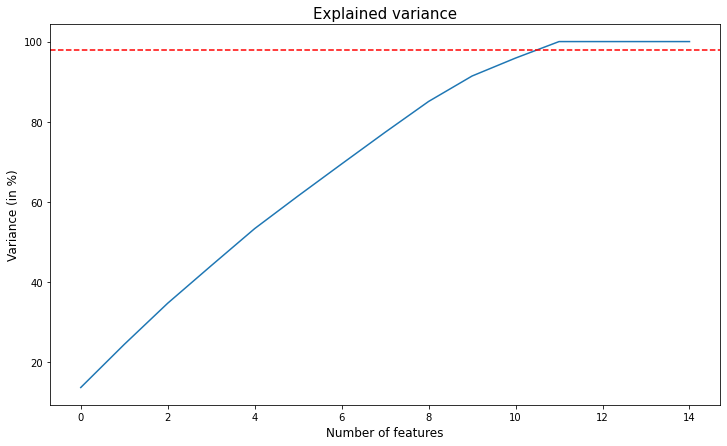

In [21]:
# Plotting cumulative sum of explained variance
plt.figure(figsize=(12, 7))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)
plt.xlabel("Number of features", size=12)
plt.ylabel("Variance (in %)", size=12)
plt.title("Explained variance", size=15)

# Plotting line at 95% variance
plt.axhline(y=98, linestyle="--", color="red")

plt.show()

    From the above plot, using only 4 features out of 15 features, 98% of variance can be retained. 

In [22]:
# Selecting 8 features using PCA
pca = PCA(8).fit(x_train)

# Transforming training dataset using newly created PCA model
x_train_transformed = pca.transform(x_train)
x_test_transformed = pca.transform(x_test)

In [23]:
# Features reduced to 8 from 15
x_train.shape, x_train_transformed.shape

((412551, 15), (412551, 8))

In [24]:
# Performing linear regression on the dataset after PCA
lr = LinearRegression(normalize=True)

# Fit the model
lr.fit(x_train_transformed, y_train)

# Predict results
y_pred_train = lr.predict(x_train_transformed)
y_pred_test = lr.predict(x_test_transformed)

# Importing Mean Squared Error to calcualte RMSE
from sklearn.metrics import mean_squared_error as MSE

# Calculate error
train_error = MSE(y_pred_train, y_train, squared=False)
test_error = MSE(y_pred_test, y_test, squared=False)

print(f"Train error: {train_error}\nTest error: {test_error}")

Train error: 0.944597039714872
Test error: 0.9472332511512772


The error seems to have decreased very minutely as the variance for choosing 8 components or more seems to be the same. Hence, the model works almost the same with 15 features and 8 features. Therefore, the dimensionality of the dataset is reduced from 15 to 8 features. 